In [1]:
import re
import numpy as np

def open_file(filename, castType=float, header=False):
    data = []
    with open(filename, "r") as f:
        for line in f.readlines()[1 if header else 0:]: 
            line = re.sub(' +', ' ', line)
            data.append(list(map(castType, line.split(" ")[1:-1])))
    return np.array(data)
data = open_file("results/output")

## Récupération des résultats de l'algorithme

In [2]:
import pandas as pd
data = pd.DataFrame(data, columns=["ie", "t0L1", "zL1", "xL1", "yL1", "resL1", "q", "t0", "z", "x", "y", "res", "q2"])

In [3]:
data.describe()

,ie,t0L1,zL1,xL1,yL1,resL1,q,t0,z,x,y,res,q2
count,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000
mean,538.000000,176162.211872,1.094047,365.855441,-2348.338241,0.375473,13.896163,176161.998583,1.083721,365.777116,-2348.339913,1.284379,13.663677
std,310.470074,31245.336428,1.019631,0.727317,0.609012,8.579468,5.891945,31245.134469,0.958965,0.594979,0.462155,32.357129,5.866074
min,1.000000,80852.796900,-2.700000,352.000000,-2360.100100,0.000000,5.000000,80852.750000,-2.700000,352.000000,-2349.800050,0.000000,4.500000
25%,269.500000,166792.664500,0.400000,365.600006,-2348.600100,0.076389,9.500000,166792.680000,0.500000,365.500000,-2348.600100,0.009636,9.062500
50%,538.000000,186895.031000,1.100000,365.799988,-2348.399900,0.108469,13.000000,186895.000000,1.100000,365.700012,-2348.300050,0.017321,13.000000
75%,806.500000,199892.375000,1.700000,366.100006,-2348.100100,0.129261,19.000000,199892.352000,1.600000,366.000000,-2348.100100,0.031145,18.500000
max,1075.000000,212276.406000,4.300000,368.200012,-2340.000000,280.843384,25.000000,212276.406000,4.000000,368.399994,-2340.000000,999.000000,25.000000


In [4]:
data.head()

,ie,t0L1,zL1,xL1,yL1,resL1,q,t0,z,x,y,res,q2
0,1.0,80852.7969,1.1,365.500000,-2347.00000,0.098958,15.0,80852.7500,1.3,365.399994,-2347.00000,0.015243,15.00
1,2.0,84573.0703,1.5,365.399994,-2347.30005,0.117527,23.0,84573.0938,1.4,365.500000,-2347.00000,0.019032,23.00
2,3.0,85297.2266,4.3,365.200012,-2347.89990,0.067188,10.0,85297.2500,4.0,364.799988,-2348.19995,0.007330,10.00
3,4.0,87442.0781,3.5,365.500000,-2347.80005,0.126698,11.5,87442.0938,3.3,365.399994,-2348.10010,0.043104,11.25
4,5.0,88422.1250,3.5,365.299988,-2347.89990,0.110577,13.0,88422.1250,3.5,365.200012,-2348.19995,0.032677,13.00


## Visualisation des données
### Évolution de q2 sur la profondeur

<IPython.core.display.Javascript object>


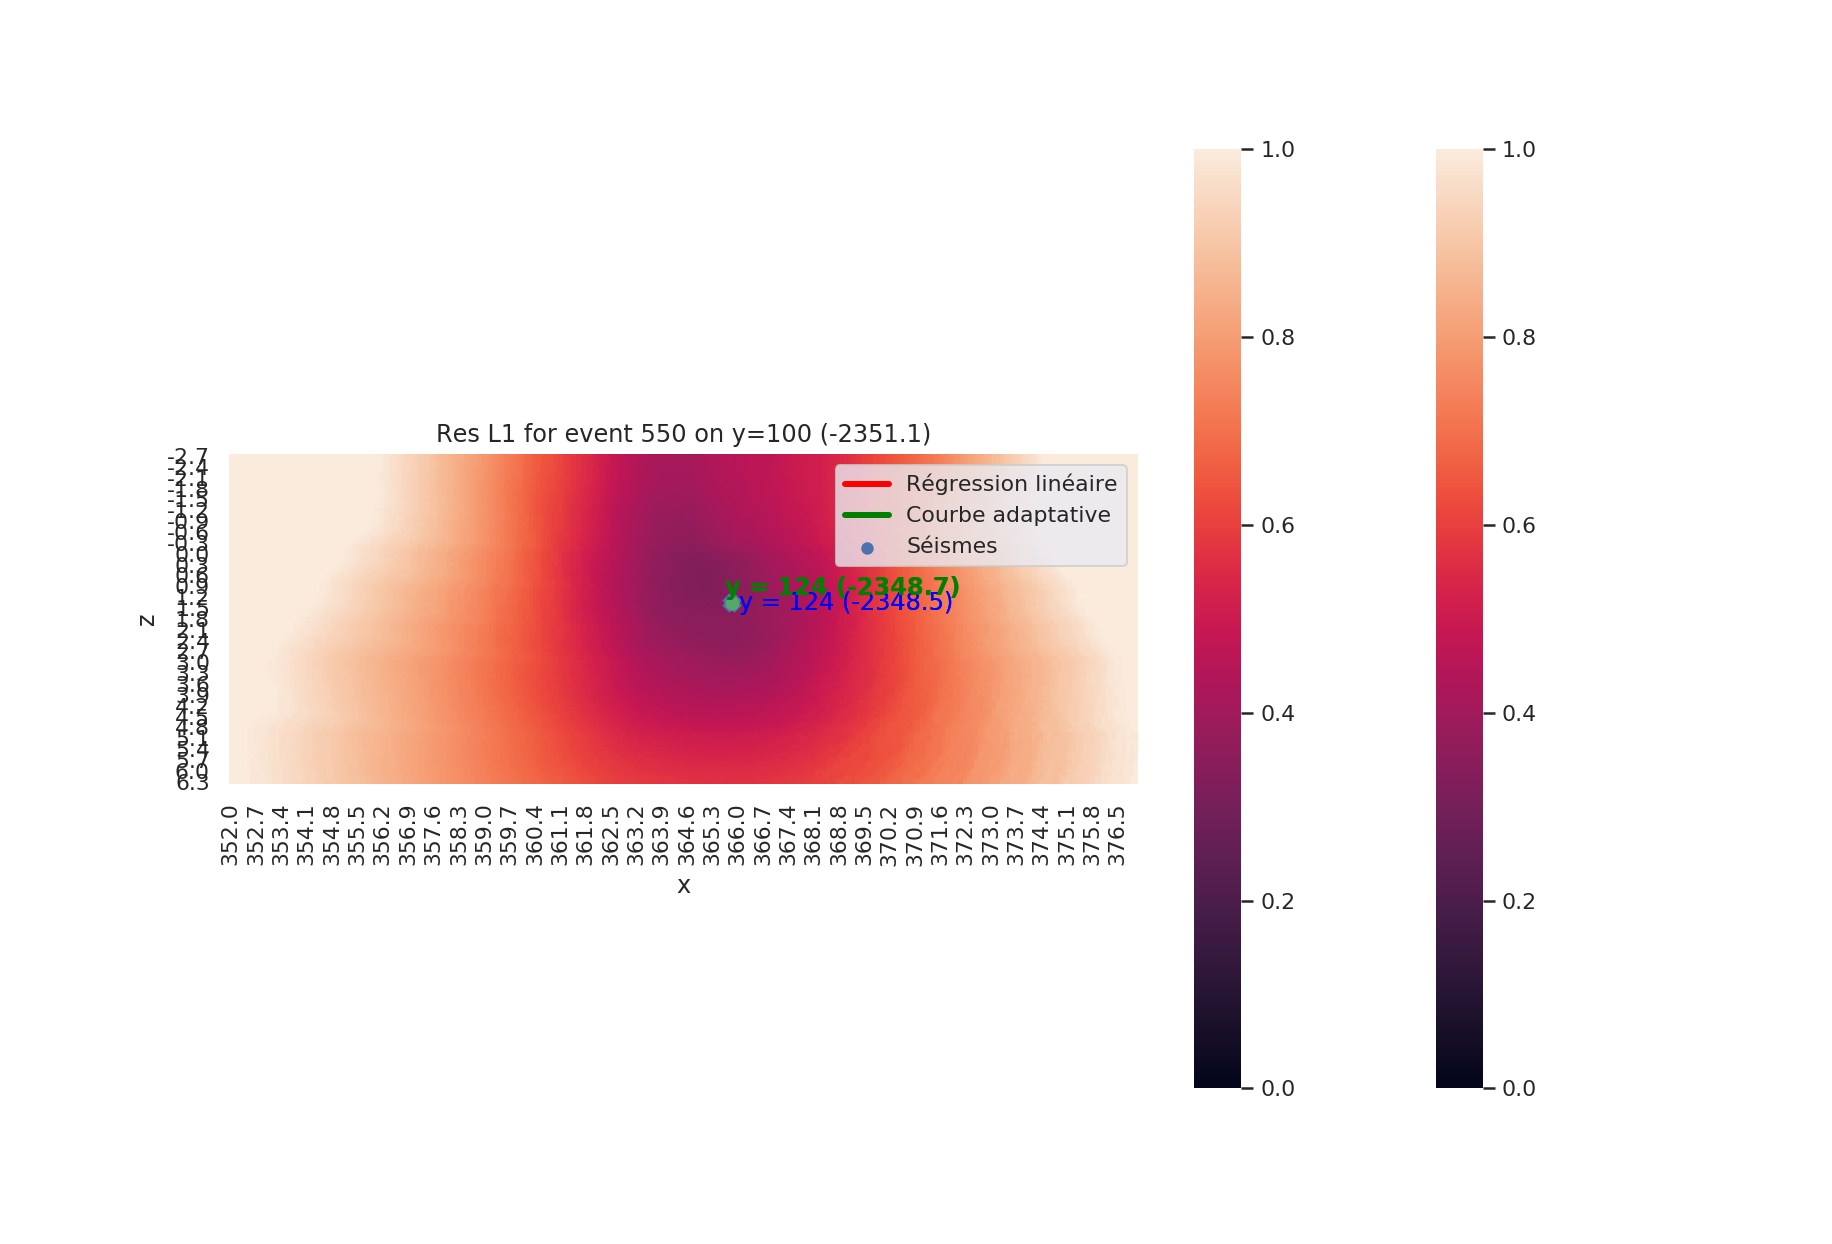

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.scatter(data["t0L1"], - data["zL1"], label="Séismes", s=data["q"]**1.2, c=data["yL1"], cmap='winter')
plt.ylabel("Altitude z estimée de l'épicentre (km)")
plt.xlabel("Date t0 du séisme (s)")
# cbar = plt.colorbar()
# cbar.set_label("t0")

# Adding linear regression
from sklearn.linear_model import LinearRegression
X = np.array(data["t0L1"]).reshape(-1, 1)
Y = - data["zL1"]
linear_regressor = LinearRegression()  # create object for the class
regr = linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.plot(X, Y_pred, color='red', label="Régression linéaire", linewidth=3)
plt.plot([80700, 168000, 212000], [-3.3, -1.7, -0.4], label="Courbe adaptative", linewidth=3, color="green")
plt.title("Altitude des séismes en fonction du temps.\n (la taille des points est proportionnelle à la confiance en l'estimation\n et la couleur est liée à la position dans l'axe (Oy))")
plt.legend()
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print(f'Slope: {regr.coef_[0]:.2e}')
print(f'Intercept: {regr.intercept_:.2f}')
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y, Y_pred))
# Explained variance score: 1 is perfect prediction
print('R2 variance score: %.2f' % r2_score(Y, Y_pred))

# Vitesse de remontée
speed = regr.coef_[0]
print(f"\n>>> Vitesse de remontée = {speed * 1000:.3f} m/s = {speed * 3600:.3f} km/h")

Slope: 2.37e-05
Intercept: -5.27
Mean squared error: 0.49
R2 variance score: 0.53

>>> Vitesse de remontée = 0.024 m/s = 0.085 km/h


### Visualisation 3D de la remontée

<IPython.core.display.Javascript object>


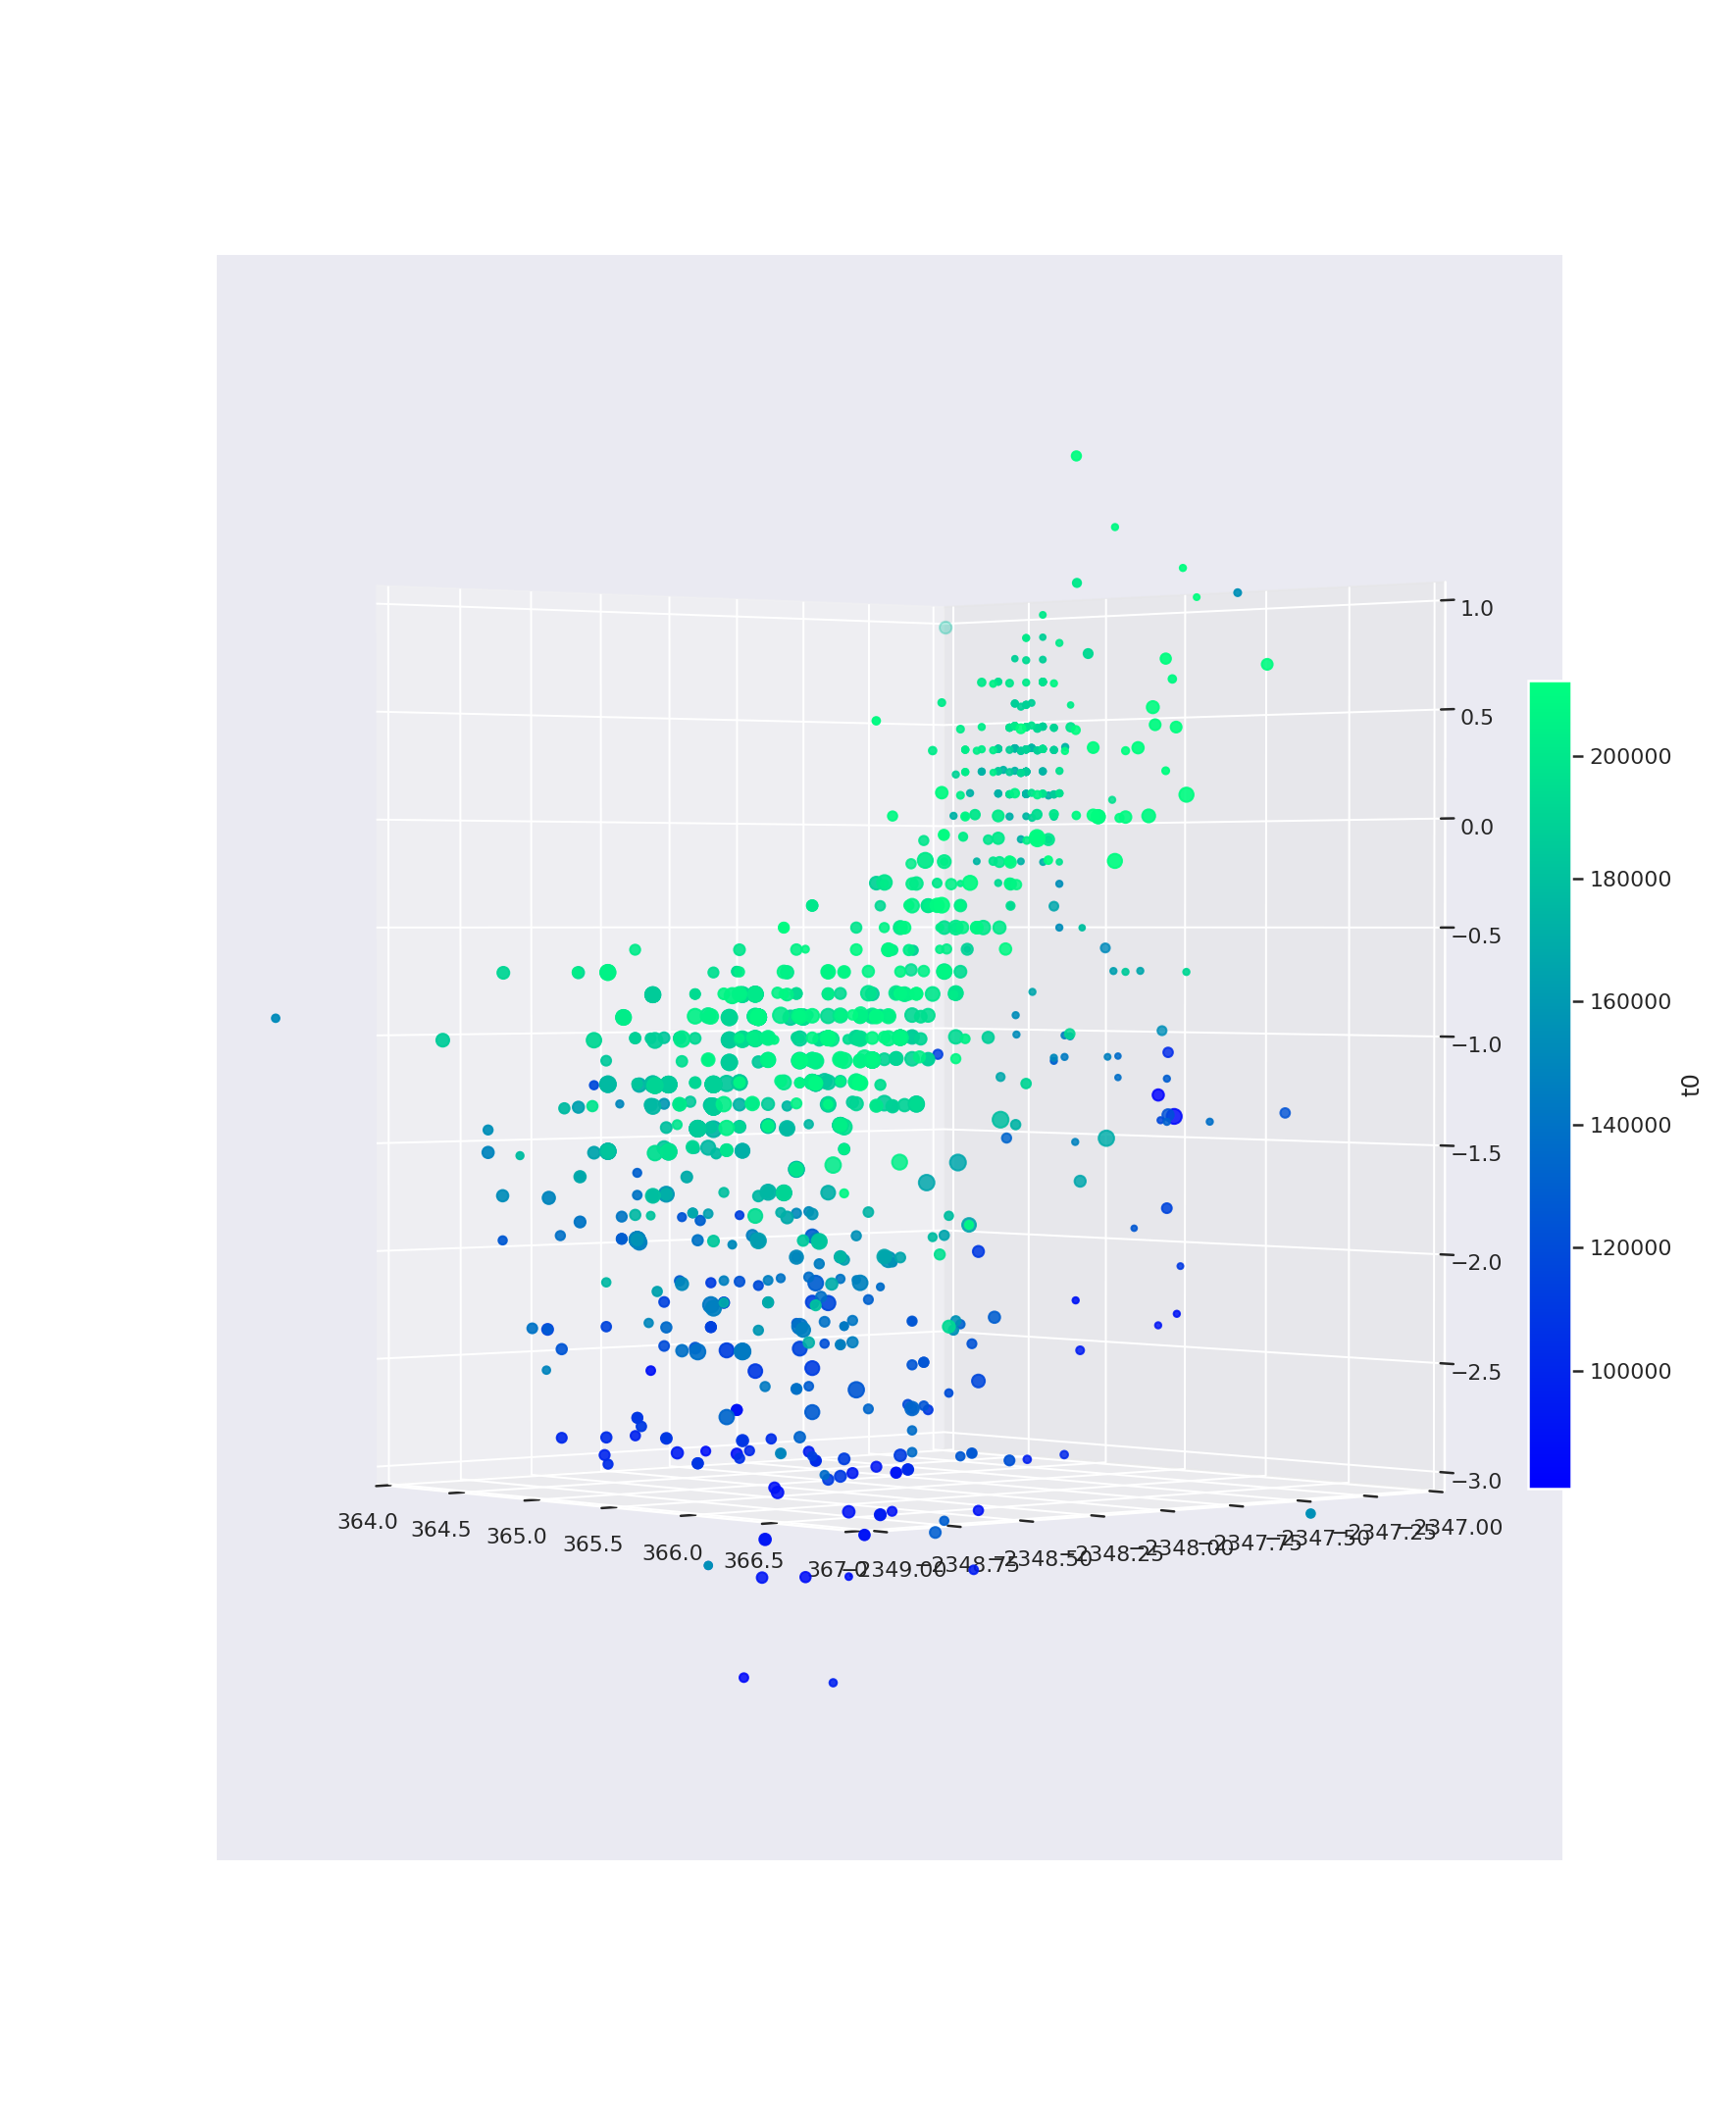

In [36]:
from mpl_toolkits import mplot3d
%matplotlib notebook

fig = plt.figure(figsize=(11, 15))
ax = plt.axes(projection='3d')
ax.set_xlim([364, 367])

ax.set_ylim([-2349, -2347])

ax.set_zlim([-3, 1])

p = ax.scatter3D(data["x"], data["y"], - data["z"], c=data["t0"], cmap='winter', s=data["q"] ** 1.3)

# Show color scale
cbar = fig.colorbar(p, cax = fig.add_axes([0.88, 0.3, 0.025, 0.38]))
cbar.set_label("t0")

plt.show()

### Récupération des données hypo pour comparaison

In [8]:
import utm

In [9]:
utm.from_latlon(*[53, 23])

(634213.2490749483, 5874141.631130975, 34, 'U')

In [10]:
hypo = open_file("results/Figures/hypo.tout", castType=str, header=True)
hypo = pd.DataFrame(hypo, columns=["lat", "lon", "z", "nobs", "gap", "date", "time", "rms"])
# Cast time to minutes
hypo["time"] = hypo["time"].apply(lambda time: 60*int(time[:2]) + int(time[3:]))
hypo["t0"] = 3600*hypo["date"].astype(int) + hypo["time"]

In [11]:
hypo.head()

,lat,lon,z,nobs,gap,date,time,rms,t0
0,55.7032,-21.2202,1.31,15,110,980307,1347,0.12,3529106547
1,55.7047,-21.2190,1.43,23,64,980307,1409,0.12,3529106609
2,55.6993,-21.2303,3.92,10,94,980307,1421,0.08,3529106621
3,55.7078,-21.2242,3.71,12,90,980308,17,0.11,3529108817
4,55.7050,-21.2252,4.33,13,51,980308,33,0.09,3529108833


In [12]:
hypo[["x", "y"]] = hypo[["lat", "lon"]].astype(float).apply(lambda row: pd.Series(list(utm.from_latlon(row["lat"], row["lon"]))[:2]), axis=1)

In [13]:
hypo.describe()

,time,t0,x,y
count,1075.000000,1.075000e+03,1075.000000,1.075000e+03
mean,492.208372,3.529112e+09,485524.149253,6.173652e+06
std,359.179050,1.473928e+03,184.659170,1.617791e+03
min,1.000000,3.529107e+09,484874.051478,6.172636e+06
25%,243.000000,3.529110e+09,485402.925504,6.173361e+06
50%,438.000000,3.529113e+09,485505.686192,6.173550e+06
75%,608.500000,3.529113e+09,485610.471506,6.173794e+06
max,1439.000000,3.529113e+09,486350.440560,6.225159e+06


#### -> Echec de la conversion UTM

### Afficher une tranche de résidus

In [14]:
from numpy import round
# Récupérer la position d'un séisme

## Index <-> UTM conversion
h = 0.1
def to_utm_y(iy):
    return round((iy - 1) * h - 2361, 1)

def to_utm(ix, iy, iz):
    return round((ix - 1) * h + 352, 1), to_utm_y(iy), round((iz - 1) * h - 2.7, 1)

def from_utm(x, y, z):
    return 1 + int((x - 352) / h), 1 + int((y + 2361) / h), 1 + int((z + 2.7) / h)

def get_epicentre_utm(event, L1=True):
    seisme = data.loc[data["ie"] == event].iloc[0]
    return round(seisme["x" + ("L1" if L1 else "")], 1), round(seisme["y" + ("L1" if L1 else "")], 1), round(seisme["z" + ("L1" if L1 else "")], 1)

def get_epicentre(event, L1=True):
    return from_utm(*get_epicentre_utm(event))

def get_epicentre_xz(event, offset=0, L1=True):
    x, z = get_epicentre(event)[::2]
    return x + offset, z + offset

def plot_epicentre(event, ax=None):
    if ax is None:
        plt.plot(*get_epicentre_xz(event, L1=False), 'bx', markeredgewidth=5)
        plt.text(*get_epicentre_xz(event, L1=False, offset=2), f"y = {get_epicentre(event, L1=False)[1]} ({get_epicentre_utm(event, L1=False)[1]})", color="blue")
        plt.plot(*get_epicentre_xz(event), 'go')
        plt.text(*get_epicentre_xz(event, offset=-2), f"y = {get_epicentre(event)[1]} ({get_epicentre_utm(event)[1]})", color="green", weight="bold")
    else:
        plt.plot(*get_epicentre_xz(event, L1=False), 'bx', markeredgewidth=5)
        plt.text(*get_epicentre_xz(event, L1=False, offset=2), f"y = {get_epicentre(event, L1=False)[1]} ({get_epicentre_utm(event, L1=False)[1]})", color="blue")
        ax.plot(*get_epicentre_xz(event), 'go')
        ax.text(*get_epicentre_xz(event, offset=-2), f"y = {get_epicentre(event)[1]} ({get_epicentre_utm(event)[1]})", color="green", weight="bold")    
get_epicentre_utm(700), get_epicentre(700), get_epicentre_xz(700)

((366.2, -2348.0, -0.2), (142, 131, 26), (142, 26))

In [15]:
# Read records
def res_file(i):
    fields = np.fromfile(open(f'results/res/resL1_{i:04d}.bin', 'rb'), dtype='float32')
    nx, ny, nz = 251, 211, 91
    return fields.reshape((ny,nx,nz))

In [16]:
_event = 700  # CHANGE TO 951: to see the outlier (cf. the analysis on the difference)
fields = res_file(_event)
fields

array([[[1.984375 , 1.9765625, 1.96875  , ..., 1.4322916, 1.4322916,
         1.4348959],
        [1.9791666, 1.9713541, 1.9583334, ..., 1.4270834, 1.4270834,
         1.4244791],
        [1.9713541, 1.9635416, 1.9505209, ..., 1.421875 , 1.421875 ,
         1.421875 ],
        ...,
        [1.8697916, 1.8619791, 1.8567709, ..., 1.3489584, 1.3489584,
         1.3489584],
        [1.875    , 1.8697916, 1.8645834, ..., 1.3489584, 1.3489584,
         1.3515625],
        [1.8828125, 1.875    , 1.8671875, ..., 1.3567709, 1.3567709,
         1.3567709]],

       [[1.9791666, 1.9713541, 1.9583334, ..., 1.4270834, 1.4296875,
         1.4244791],
        [1.9713541, 1.9635416, 1.9505209, ..., 1.4192709, 1.421875 ,
         1.421875 ],
        [1.9713541, 1.9635416, 1.9505209, ..., 1.4166666, 1.4166666,
         1.421875 ],
        ...,
        [1.8645834, 1.859375 , 1.8515625, ..., 1.34375  , 1.3463541,
         1.3463541],
        [1.8671875, 1.859375 , 1.8541666, ..., 1.3463541, 1.3489584,
   

In [17]:
import seaborn as sns

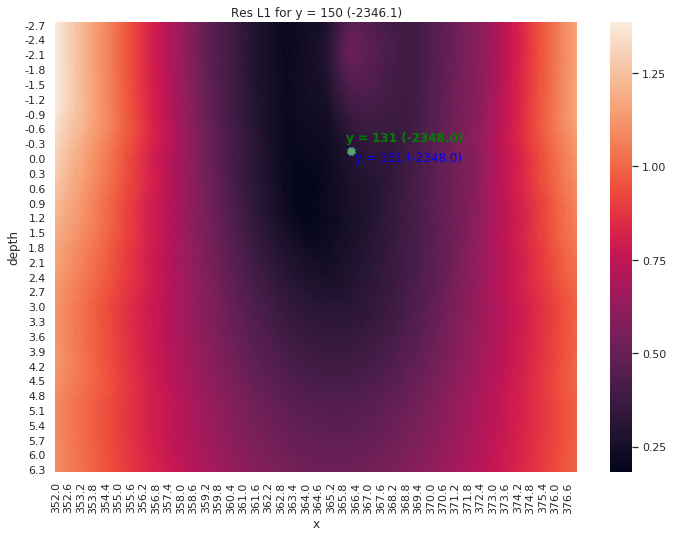

In [18]:
from numpy import round

%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})

def get_df(fields):
    df = pd.DataFrame(np.transpose(fields))
    df.index = df.index.map(lambda iz: round(iz * h - 2.7, 1))
    df.columns = df.columns.map(lambda ix: round(ix * h + 352, 1))
    return df

y = 150
sns.heatmap(get_df(fields[y]))
plt.title(f"Res L1 for y = {y} ({to_utm_y(y)})")
plt.ylabel("depth")
plt.xlabel("x")
plot_epicentre(_event)

In [19]:
sns.set(rc={'figure.figsize':(17, 12)})

def heatmap_subplots(ys, subplots_shape):
    fig, axs = plt.subplots(*subplots_shape)
    for i in range(len(axs)):
        for j in range(len(axs[i])):
            ax = axs[i, j]
            rank = i * len(axs[0]) + j
            y = int(ys[rank])
            sns.heatmap(get_df(fields[y]), ax=ax)
            ax.set_title(f"Res L1 for y={y} ({to_utm_y(y)})")
            ax.set_ylabel("depth")
            ax.set_xlabel("x")
            ax.set_aspect('equal', 'box')
            plot_epicentre(_event, ax=ax)

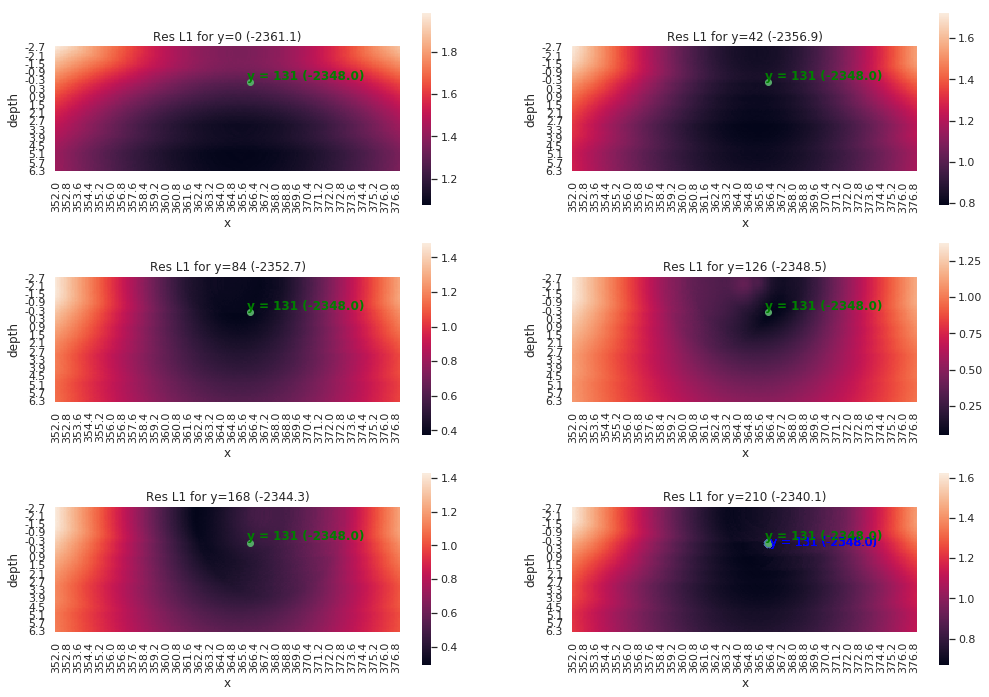

In [20]:
heatmap_subplots(np.linspace(0, 210, 6), (3, 2))

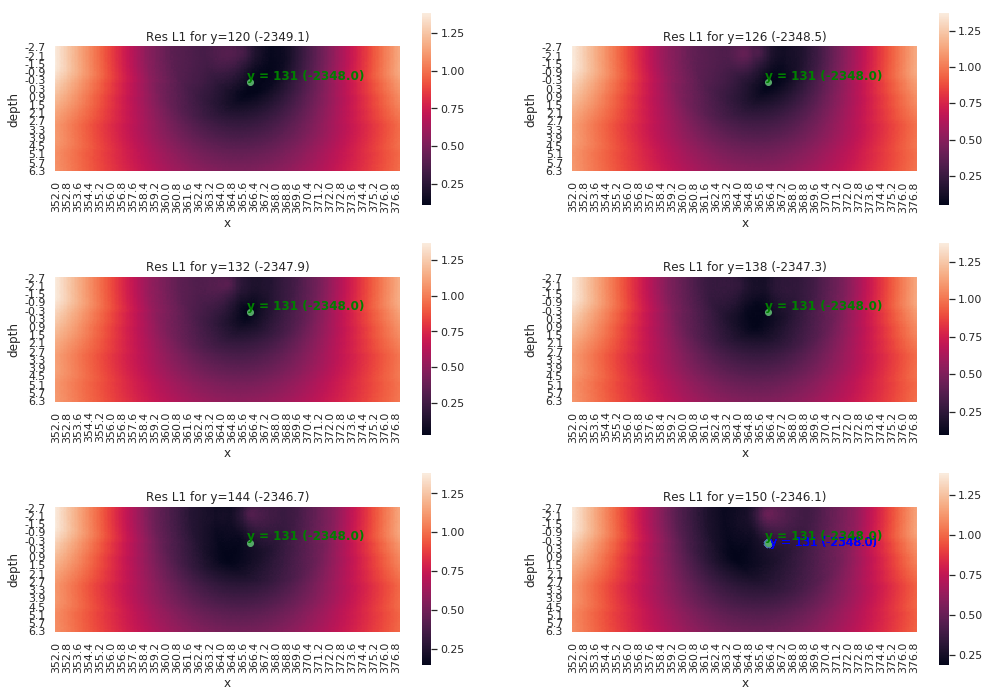

In [21]:
heatmap_subplots(np.linspace(120, 150, 6), (3, 2))

In [22]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [38]:
%matplotlib inline
sns.set(rc={'figure.figsize':(18,8.27)})

@interact(vmax=(0, 2, 0.05), vmin=(0, 2, 0.05))
def show_tranche(event=(50, 1050, 50), y=(0,210,10), vmax=1, vmin=0):
    sns.heatmap(get_df(res_file(event)[y]), vmax=vmax, vmin=vmin)
    plt.title(f"Res L1 for event {event} on y={y} ({to_utm_y(y)})")
    plt.ylabel("z")
    plt.xlabel("x")
    plt.gca().set_aspect("equal", "box")
    plot_epicentre(event)

interactive(children=(IntSlider(value=550, description='event', max=1050, min=50, step=50), IntSlider(value=10…

In [39]:
event = 700
event_fields = res_file(event)
@interact(y=(0,210,1), vmax=(0, 2, 0.05), vmin=(0, 2, 0.05))
def show_tranche(y=131, vmax=0.25, vmin=0):
    sns.heatmap(get_df(event_fields[y]), vmin=0, vmax=vmax)
    plt.title(f"Résidus en norme L1 pour le séisme #{event} sur le plan y #{y} ({to_utm_y(y)} en UTM)")
    plt.ylabel("Profondeur (km)")
    plt.xlabel("x en coordonnées UTM")
    plt.plot([137, 147, 147, 137, 137], [31, 31, 21, 21, 31], "g-")
    plt.gca().set_aspect("equal", "box")
    plot_epicentre(event)

interactive(children=(IntSlider(value=131, description='y', max=210), FloatSlider(value=0.25, description='vma…

## Analyse de la différence

In [25]:
df = pd.DataFrame({
    "x": data["xL1"] - data["x"], 
    "y": data["yL1"] - data["y"],
    "z": data["zL1"] - data["z"],
    "t0": data["t0L1"] - data["t0"]
})

In [26]:
df.describe()

,x,y,z,t0
count,1075.000000,1075.000000,1075.000000,1075.000000
mean,0.078325,0.001672,0.010326,0.213289
std,0.460107,0.448147,0.236941,7.156278
min,-13.699982,-11.800050,-3.300000,-0.156000
25%,0.000000,-0.199950,-0.100000,-0.031000
50%,0.100006,0.000000,0.000000,0.000000
75%,0.200012,0.100100,0.100000,0.015000
max,0.899994,1.000000,1.300000,234.625000


In [27]:
data.iloc[950]

ie          951.000000
t0L1     205340.969000
zL1          -2.400000
xL1         352.200012
yL1       -2360.100100
resL1       280.843384
q            21.000000
t0       205106.344000
z             0.900000
x           365.899994
y         -2348.300050
res         999.000000
q2           20.500000
Name: 950, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x131f6f6a0>,
      dtype=object)

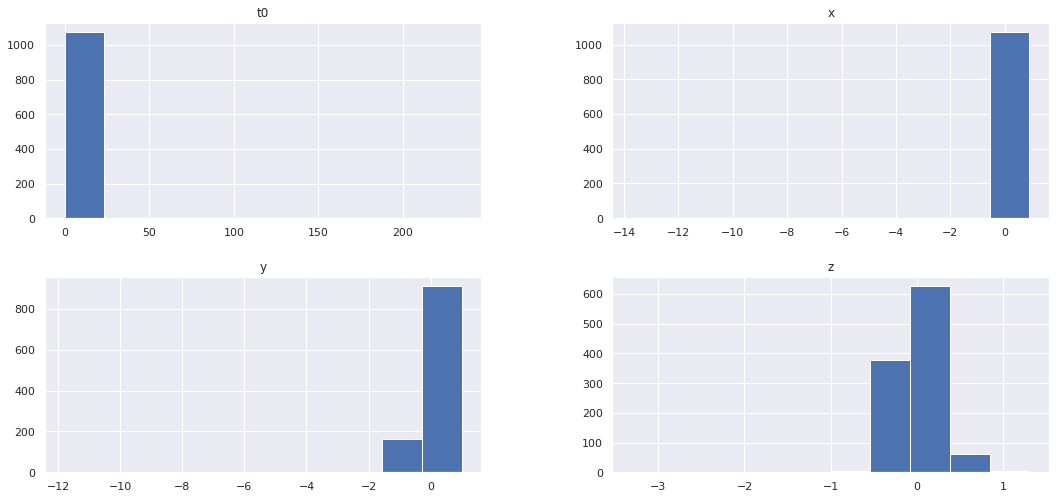

In [28]:
df.hist()

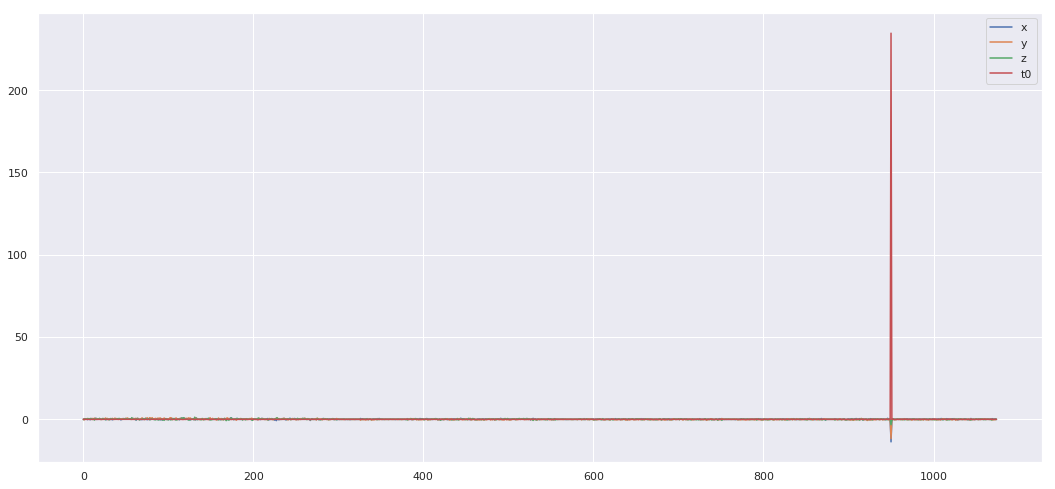

In [29]:
df.plot()

In [30]:
df[df["t0"] > 100]

,x,y,z,t0
950,-13.699982,-11.80005,-3.3,234.625


In [31]:
df = df.drop(950)
df.describe()

,x,y,z,t0
count,1074.000000,1074.000000,1074.000000,1074.000000
mean,0.091154,0.012661,0.013408,-0.004971
std,0.186561,0.266641,0.214409,0.043328
min,-0.799988,-0.699950,-0.800000,-0.156000
25%,0.000000,-0.199950,-0.100000,-0.031000
50%,0.100006,0.000000,0.000000,0.000000
75%,0.200012,0.100100,0.100000,0.015000
max,0.899994,1.000000,1.300000,0.172000


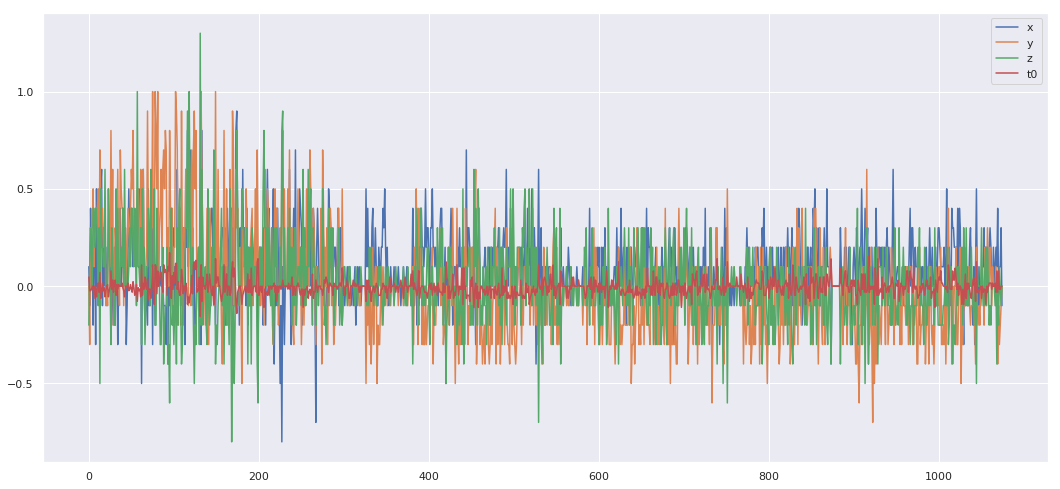

In [32]:
df.plot()

Text(0, 0.5, 'Bin count')

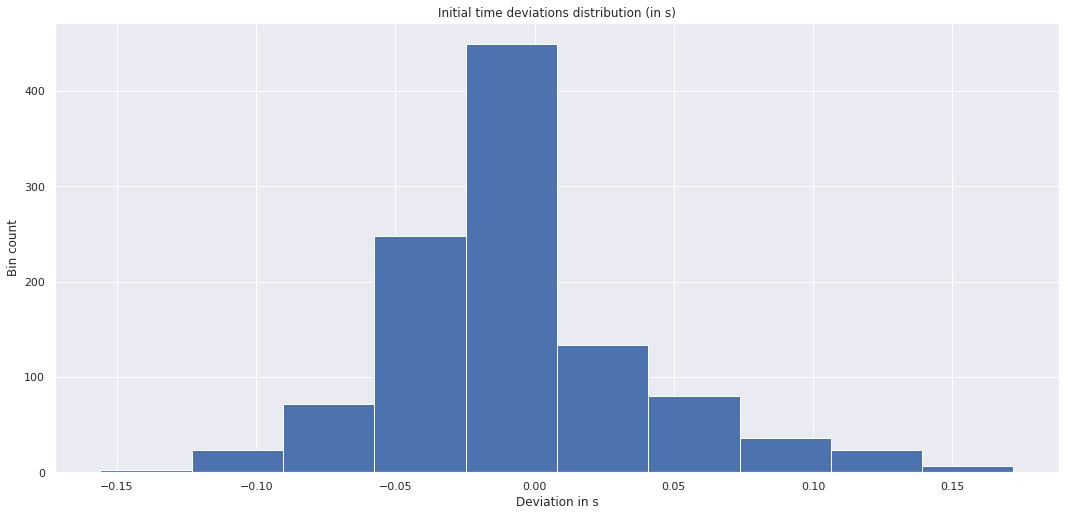

In [33]:
df['t0'].hist()
plt.title("Initial time deviations distribution (in s)")
plt.xlabel("Deviation in s")
plt.ylabel("Bin count")

Text(0.5, 0.98, 'Distance deviations distribution (in km)')

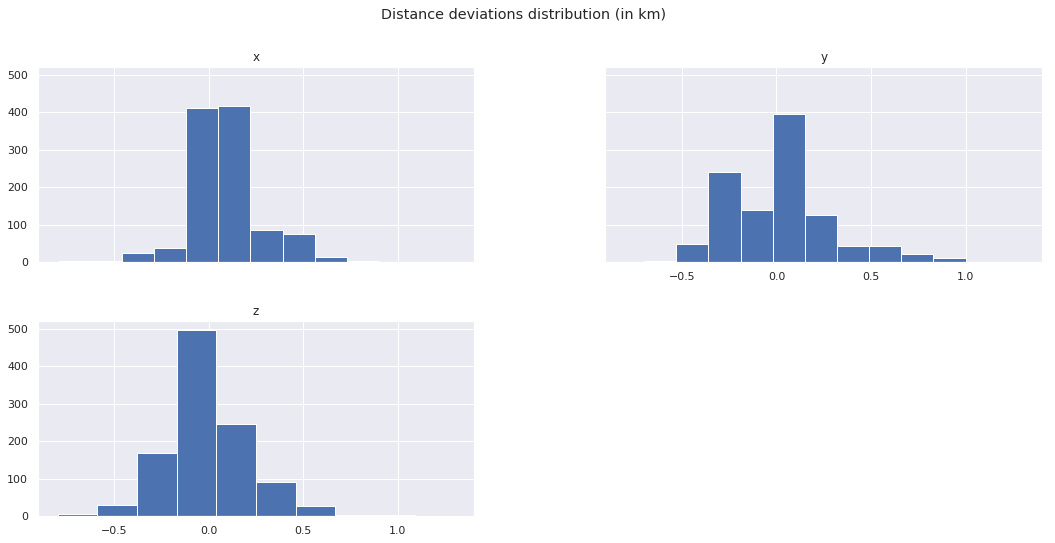

In [34]:
import pylab as pl
axes = df.hist(sharey=True, sharex=True, column=list('xyz'))
pl.suptitle("Distance deviations distribution (in km)")